In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('D:/Downloads/Week/Week 2/WineQT.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [154]:
df.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

In [173]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [3]:
df=df.drop('Id',axis=1)


In [158]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(125)

In [6]:
df.drop_duplicates(inplace=True)


In [7]:
df.duplicated().sum()

np.int64(0)

In [22]:
corr_matrix=df.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
quality_class           0.673827
alcohol                 0.511437
sulphates               0.430134
citric acid             0.244591
fixed acidity           0.100718
residual sugar          0.015400
free sulfur dioxide     0.010535
pH                     -0.087439
total sulfur dioxide   -0.169207
chlorides              -0.240997
density                -0.282044
volatile acidity       -0.332799
Name: quality, dtype: float64

[]

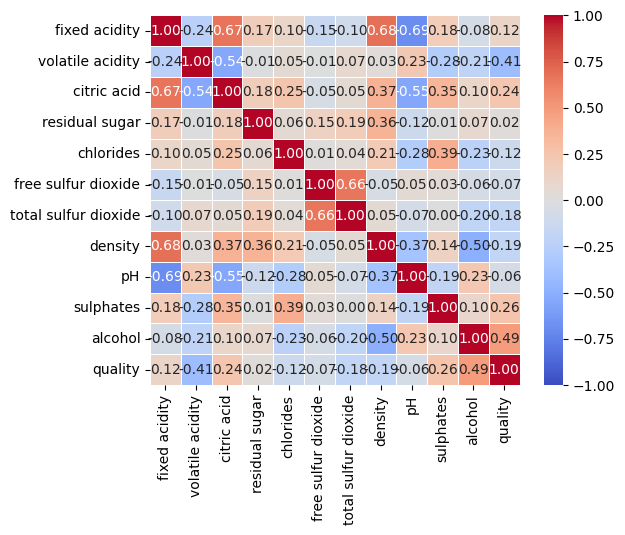

In [9]:
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5, square=True)
plt.Figure(figsize=(20,18))
plt.plot()

In [10]:

df['quality_class'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)



In [164]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Medium


In [ ]:
# ?df['density_alcohol'] = df['density'] * df['alcohol']

In [181]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Medium


In [182]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_class           0
dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_17796\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


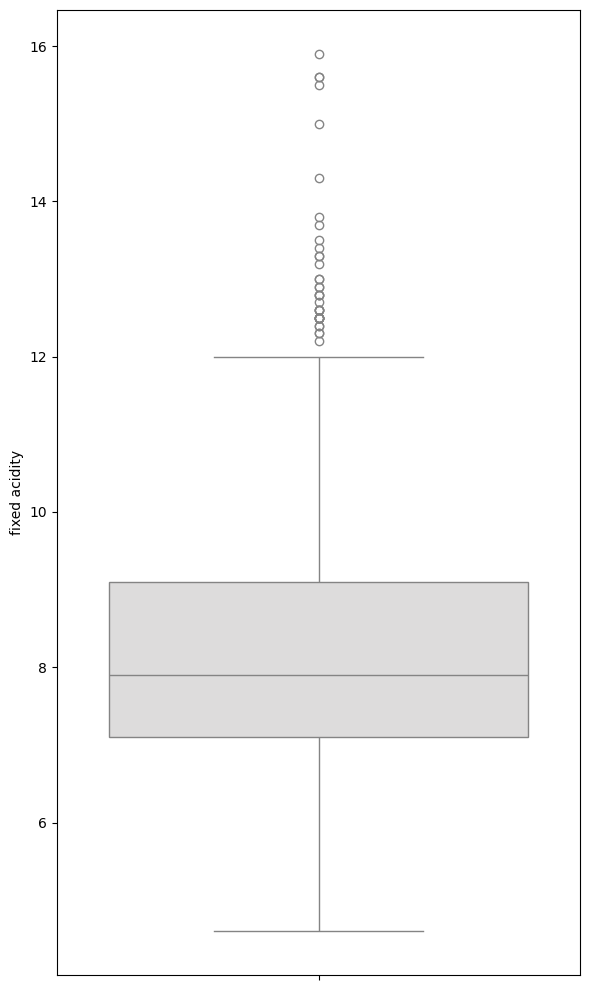

C:\Users\Dell\AppData\Local\Temp\ipykernel_17796\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


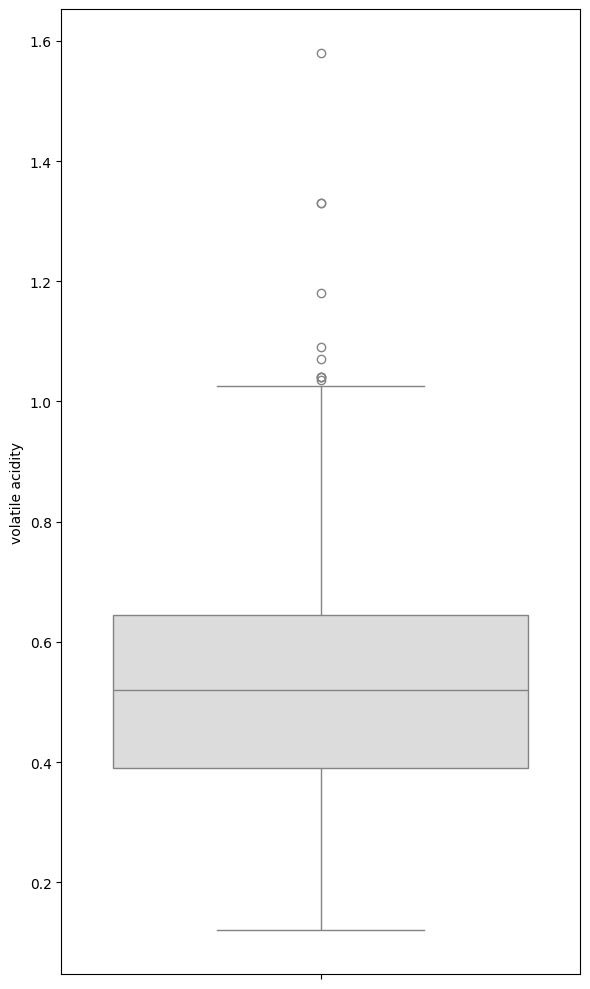

C:\Users\Dell\AppData\Local\Temp\ipykernel_17796\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


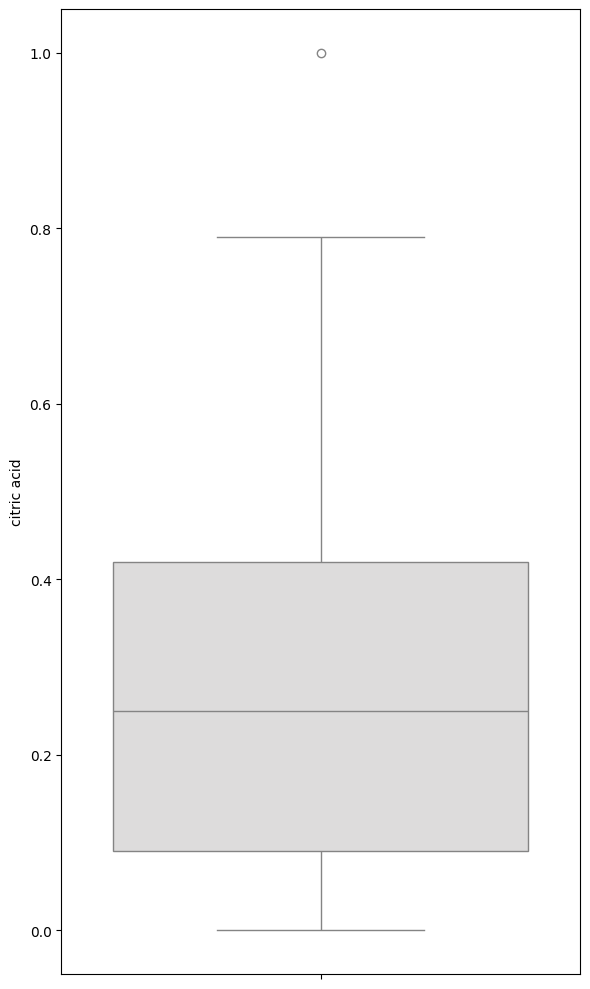

C:\Users\Dell\AppData\Local\Temp\ipykernel_17796\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


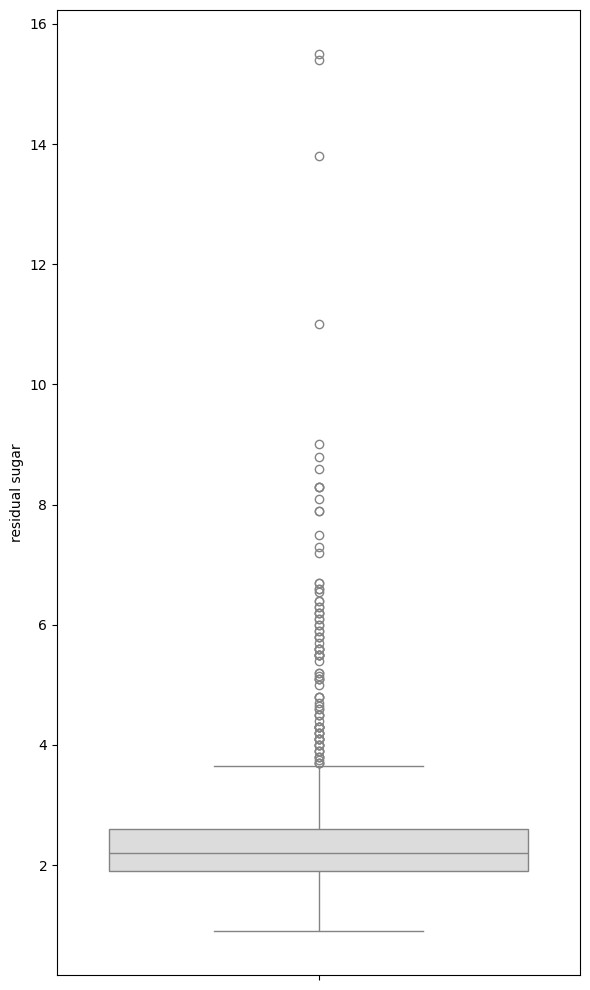

C:\Users\Dell\AppData\Local\Temp\ipykernel_17796\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


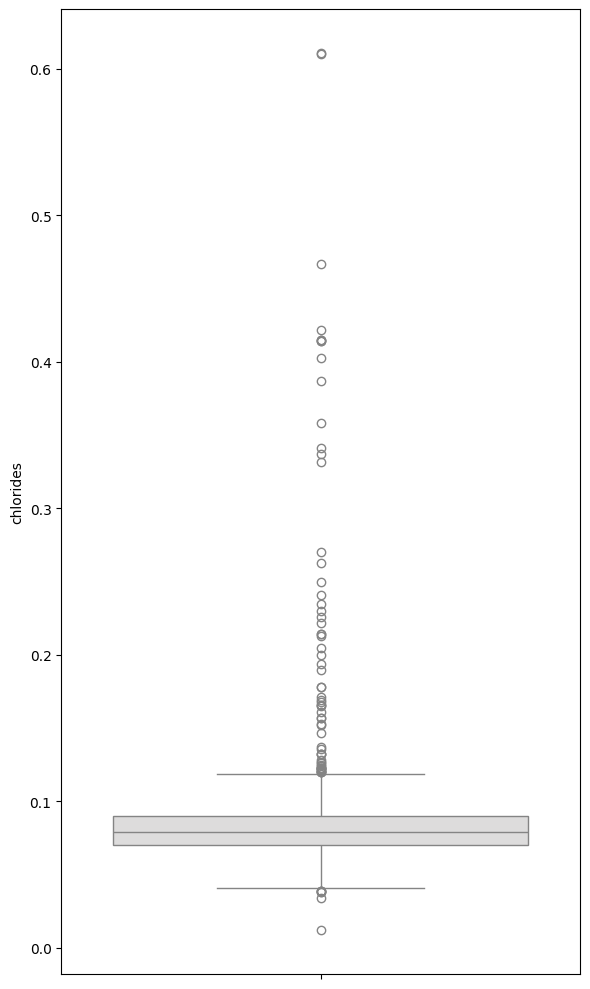

C:\Users\Dell\AppData\Local\Temp\ipykernel_17796\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


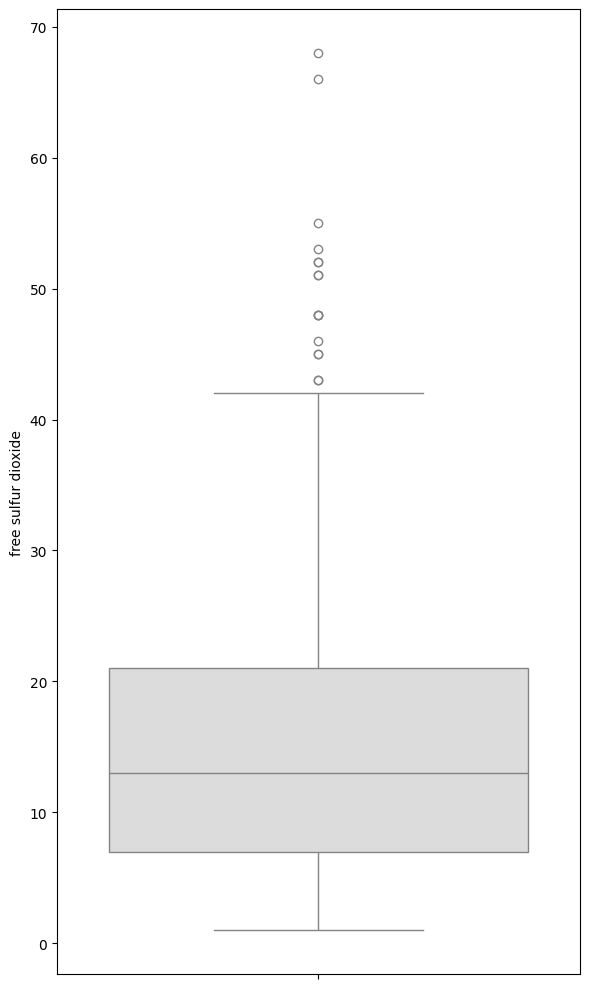

C:\Users\Dell\AppData\Local\Temp\ipykernel_17796\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


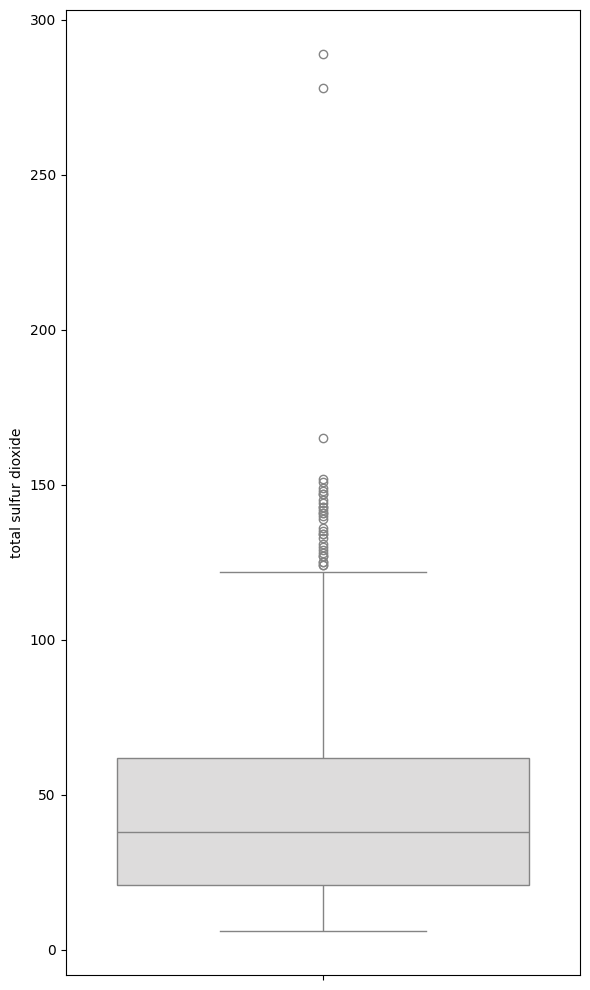

C:\Users\Dell\AppData\Local\Temp\ipykernel_17796\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


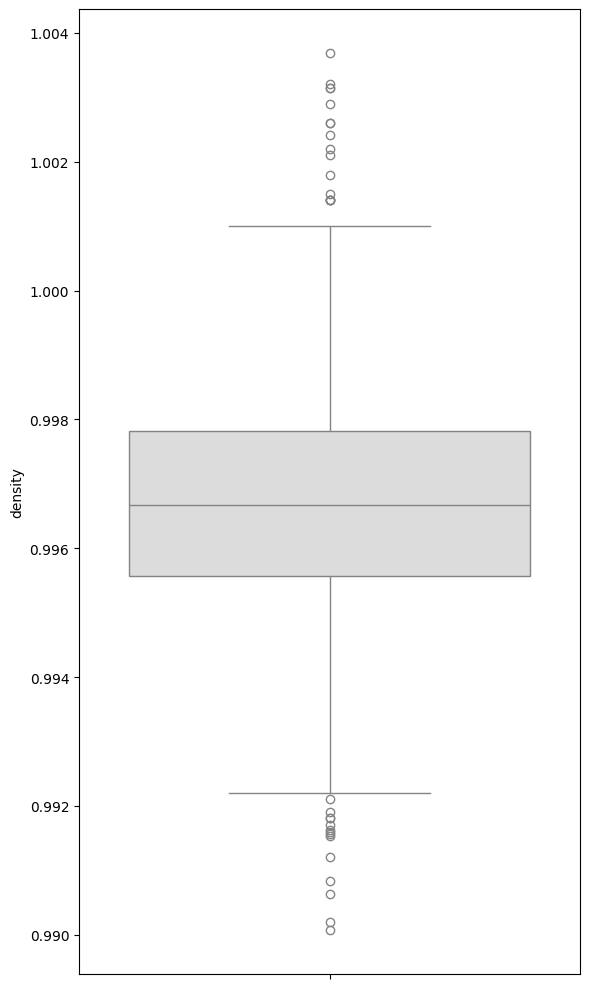

C:\Users\Dell\AppData\Local\Temp\ipykernel_17796\1563808780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


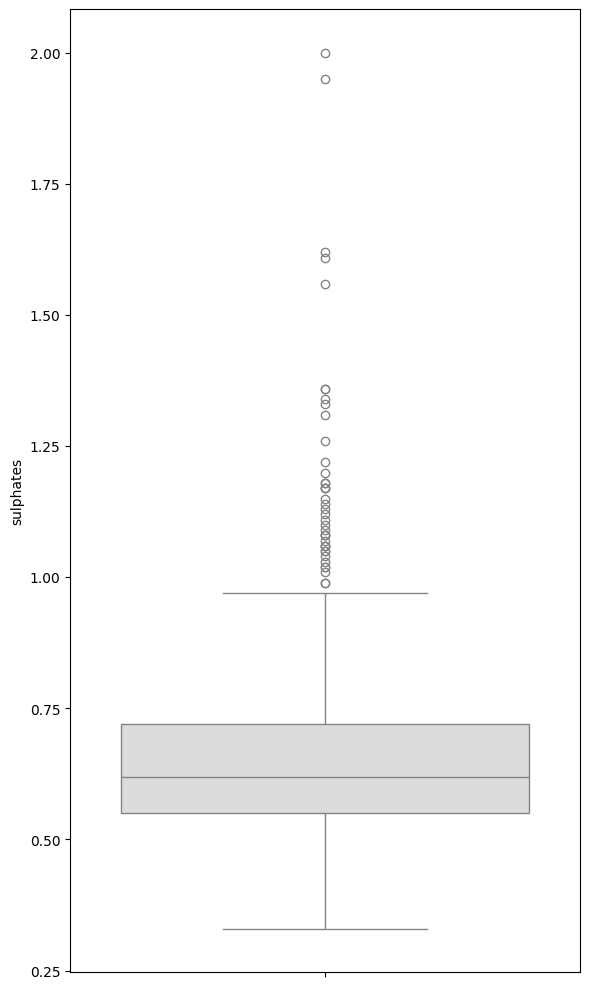

In [165]:
columns=['fixed acidity','volatile acidity','citric acid',	'residual sugar','chlorides','free sulfur dioxide',	'total sulfur dioxide','density','sulphates']
for feature in columns:
    plt.figure(figsize=(6, 10))
    sns.boxplot( y=df[feature], palette=("coolwarm"))
    plt.tight_layout()
    plt.show()

In [11]:
columns = df.drop(['quality', 'quality_class'], axis=1)

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1* IQR
    upper_bound = Q3 + 1* IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

C:\Users\Dell\AppData\Local\Temp\ipykernel_14412\1640768144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


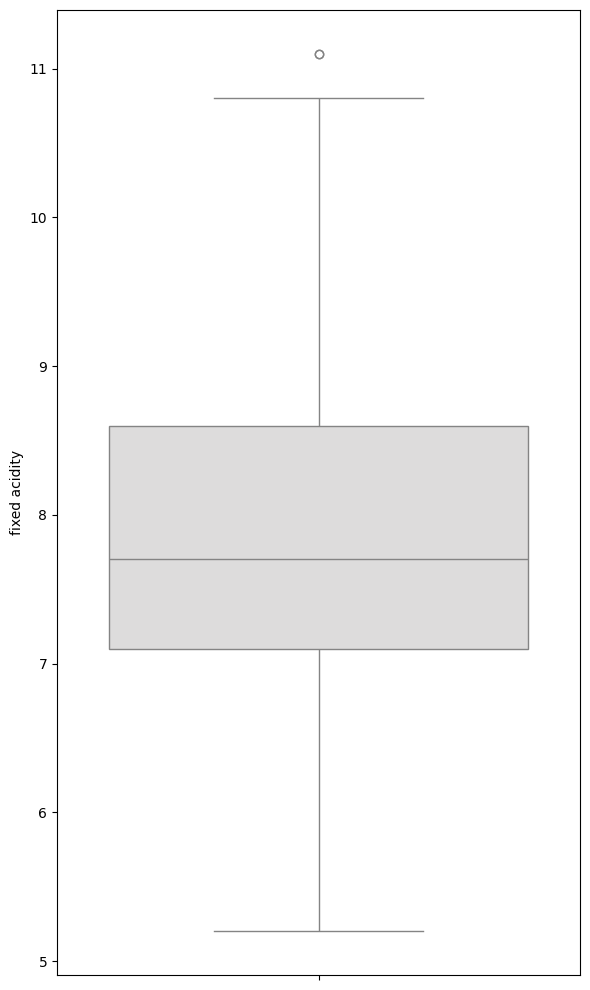

C:\Users\Dell\AppData\Local\Temp\ipykernel_14412\1640768144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


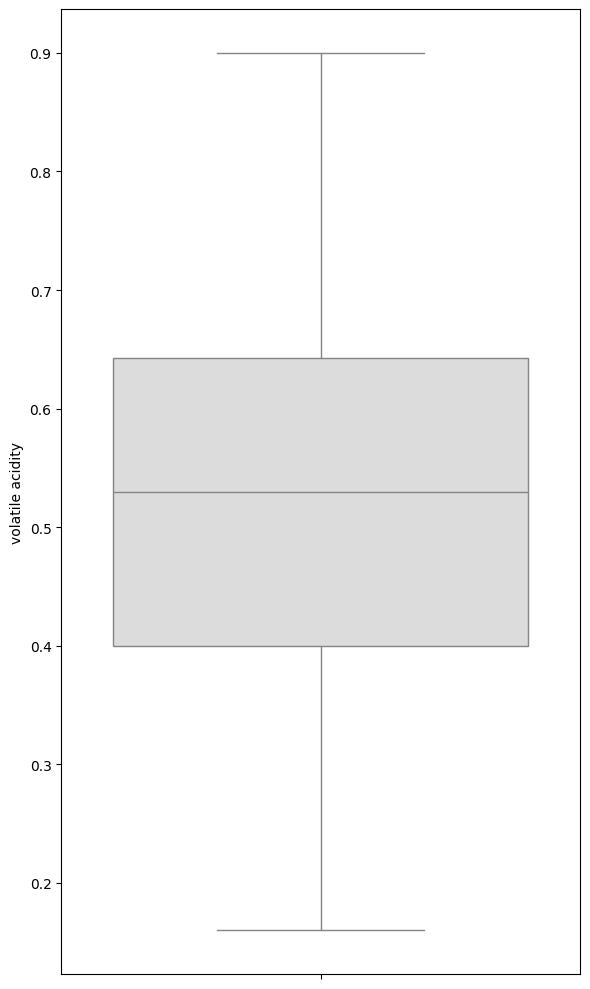

C:\Users\Dell\AppData\Local\Temp\ipykernel_14412\1640768144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


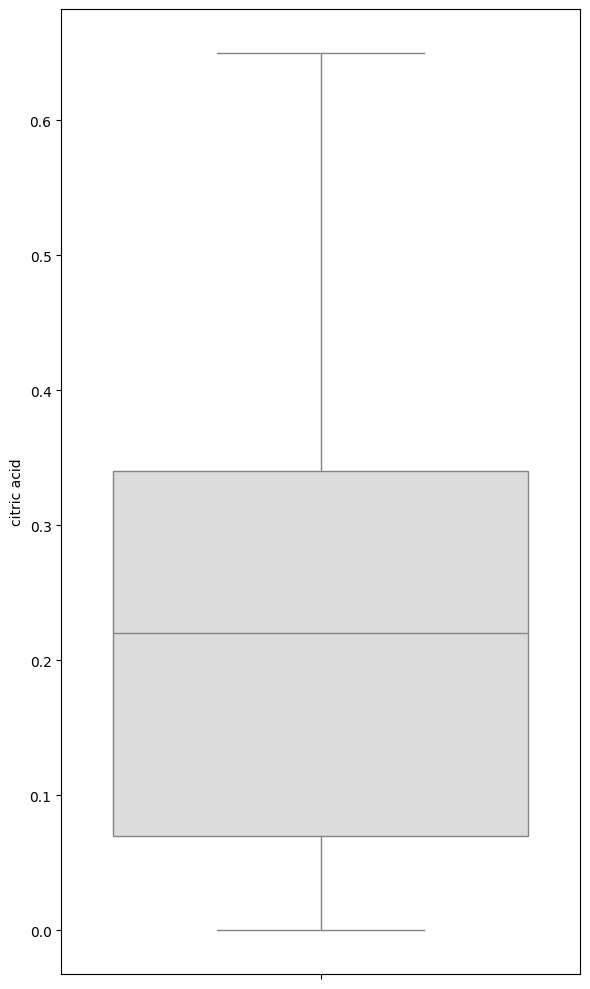

C:\Users\Dell\AppData\Local\Temp\ipykernel_14412\1640768144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


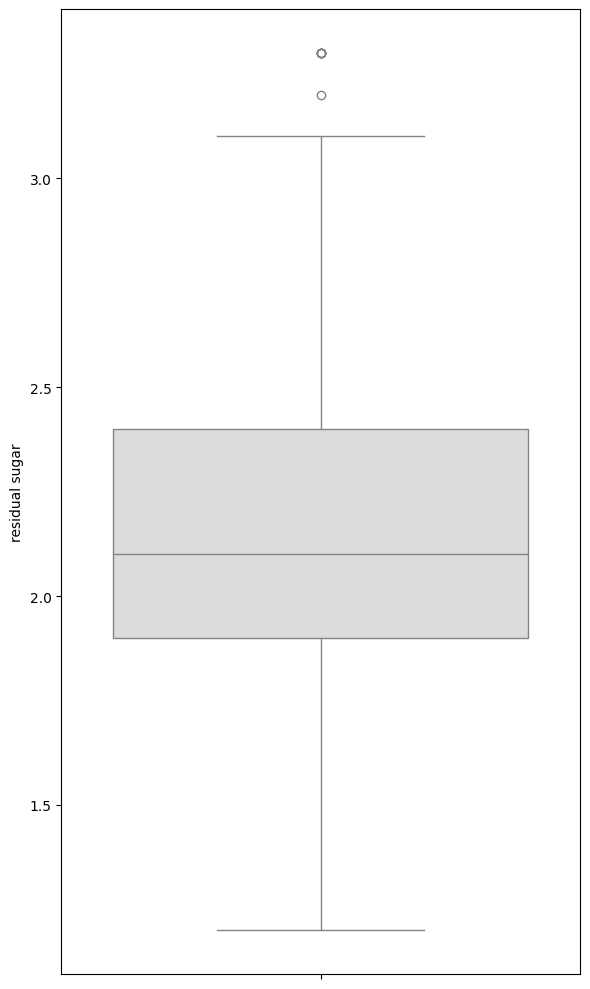

C:\Users\Dell\AppData\Local\Temp\ipykernel_14412\1640768144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


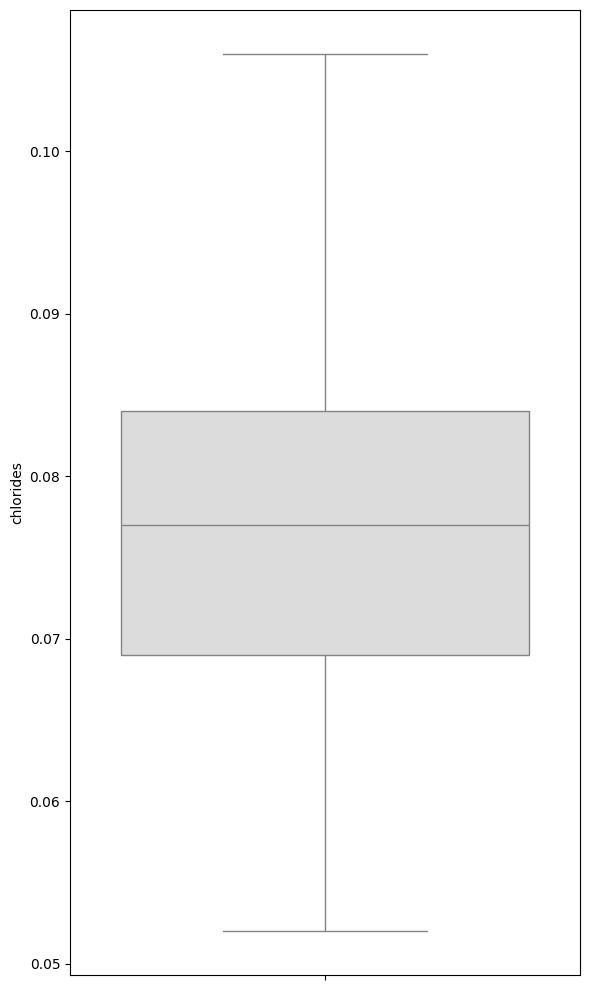

C:\Users\Dell\AppData\Local\Temp\ipykernel_14412\1640768144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


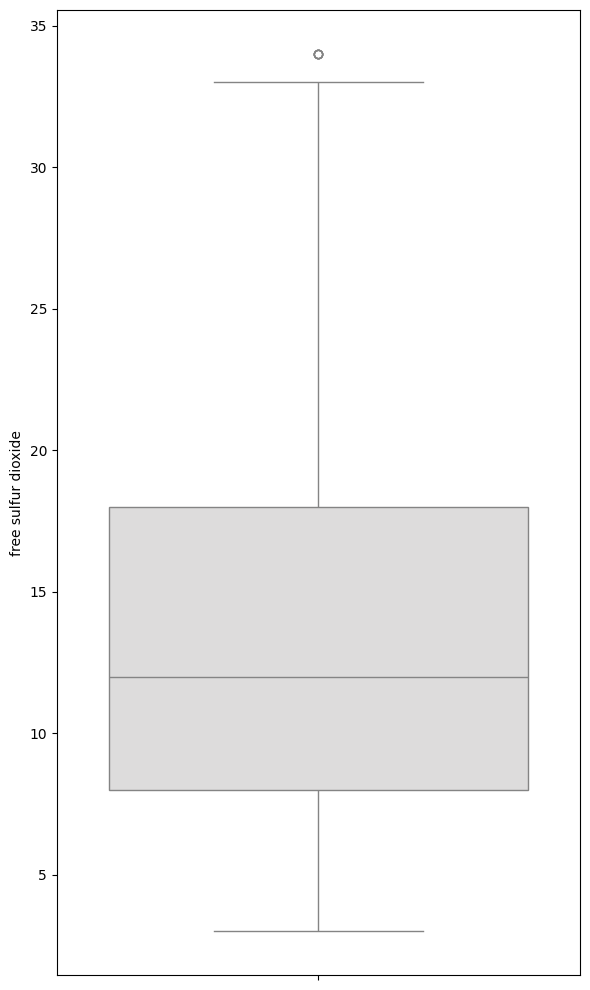

C:\Users\Dell\AppData\Local\Temp\ipykernel_14412\1640768144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


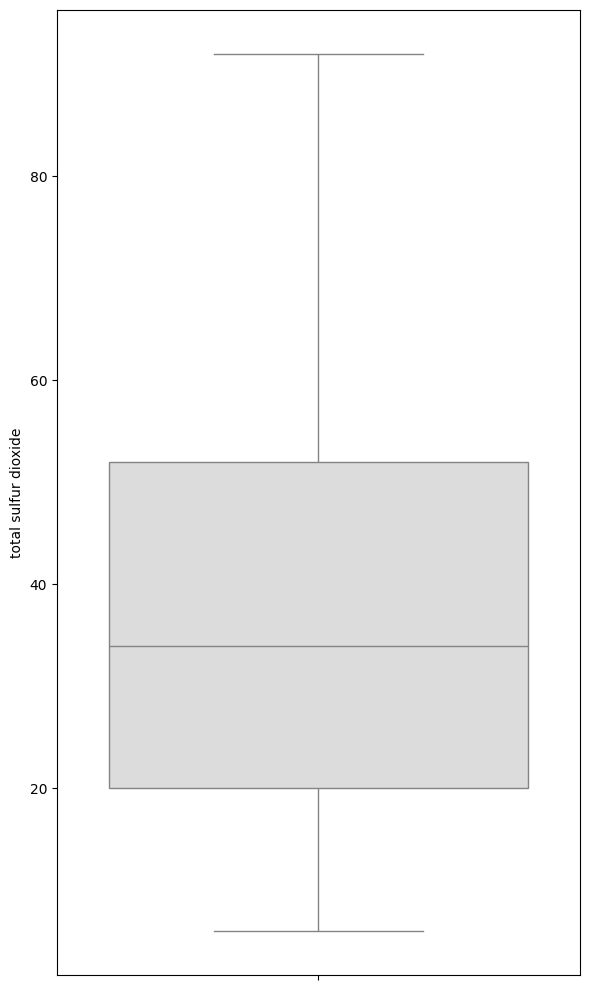

C:\Users\Dell\AppData\Local\Temp\ipykernel_14412\1640768144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[feature], palette=("coolwarm"))


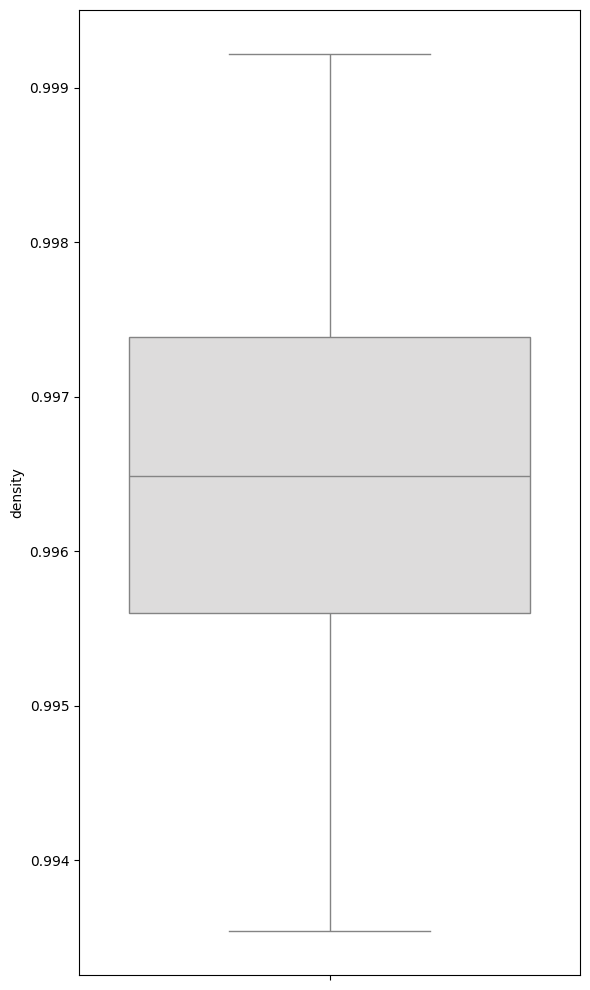

In [12]:
columns=['fixed acidity','volatile acidity',	'citric acid',	'residual sugar','chlorides','free sulfur dioxide',	'total sulfur dioxide','density']
for feature in columns:
    plt.figure(figsize=(6, 10))
    sns.boxplot( y=df[feature], palette=("coolwarm"))
    plt.tight_layout()
    plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['quality_class'] = le.fit_transform(df['quality_class'])

In [14]:

corr_matrix=df.corr()
corr_matrix['quality_class'].sort_values(ascending=False)

quality_class           1.000000
quality                 0.673827
alcohol                 0.405338
sulphates               0.304821
citric acid             0.209963
fixed acidity           0.108319
residual sugar          0.008648
free sulfur dioxide    -0.052152
pH                     -0.116083
total sulfur dioxide   -0.183382
chlorides              -0.226835
volatile acidity       -0.267901
density                -0.272433
Name: quality_class, dtype: float64

In [119]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_class'],
      dtype='object')

In [15]:
X = df[['volatile acidity', 'citric acid','chlorides', 'density', 'sulphates','alcohol','total sulfur dioxide']]

In [128]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,quality_label,sulfur_ratio,density_alcohol,alcohol_bin,pH_category,sugar_chloride_interaction
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,1,0.323529,9.37932,1,1,0.1444
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,1,0.373134,9.76864,1,2,0.2548
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,1,0.277778,9.77060,1,2,0.2116
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,2,0.283333,9.78040,1,2,0.1425
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,0.56,1,0.325000,9.37932,1,1,0.1350


In [16]:
X = df[['volatile acidity', 'citric acid','chlorides', 'density', 'sulphates','alcohol','total sulfur dioxide']]
y = df['quality_class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [19]:
pipeline={
    'KNN':Pipeline([
        ('scalar',StandardScaler()),
        ('classifier',KNeighborsClassifier())
    ]),
    'Decsion tree':Pipeline([
        ('scalar',StandardScaler()),
        ('classifier',DecisionTreeClassifier())
    
    ]),
    'Naive Byes':Pipeline([
        ('scalar',StandardScaler()),
        ('classifier',GaussianNB())
    ]),
    'Random Forest':Pipeline([
        ('scalar',StandardScaler()),
        ('classifier',RandomForestClassifier())
    ]),
    'Lasso (LogReg)': Pipeline([
    ('scalar', StandardScaler()),
    ('classifier', LogisticRegression())
        ]),
}

In [20]:

from sklearn.model_selection import GridSearchCV



param_grids = {
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    },
    'Decsion tree': {
        'classifier__max_depth': [3, 5, 10],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__splitter': ['best', 'random']
    },
    'Naive Byes': {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    # Try tuning these parameters further:
   'Lasso (LogReg)': {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
},
# Add more regularization:
'Random Forest':{
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']
}
}


In [21]:
results=[]
for name in pipeline:
    grid = GridSearchCV(pipeline[name], param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    train_acc = accuracy_score(y_train, best_model.predict(X_train))
    test_acc = accuracy_score(y_test, best_model.predict(X_test))
    cv_acc = grid.best_score_
    
    results.append((name, train_acc, test_acc, cv_acc, grid.best_params_))

# Create a result DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy", "CV Accuracy", "Best Params"])
results_df.sort_values(by="CV Accuracy", ascending=False, inplace=True)

print(results_df)


            Model  Train Accuracy  Test Accuracy  CV Accuracy  \
3   Random Forest        0.945205       0.902564     0.921333   
4  Lasso (LogReg)        0.917808       0.907692     0.914436   
0             KNN        1.000000       0.912821     0.907423   
1    Decsion tree        0.941781       0.876923     0.897312   
2      Naive Byes        0.890411       0.897436     0.890240   

                                         Best Params  
3  {'classifier__max_depth': 5, 'classifier__max_...  
4  {'classifier__C': 1, 'classifier__penalty': 'l...  
0  {'classifier__n_neighbors': 7, 'classifier__we...  
1  {'classifier__criterion': 'entropy', 'classifi...  
2               {'classifier__var_smoothing': 1e-09}  


In [24]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Good','Not Good']))

              precision    recall  f1-score   support

        Good       0.91      0.99      0.95       174
    Not Good       0.80      0.19      0.31        21

    accuracy                           0.91       195
   macro avg       0.86      0.59      0.63       195
weighted avg       0.90      0.91      0.88       195



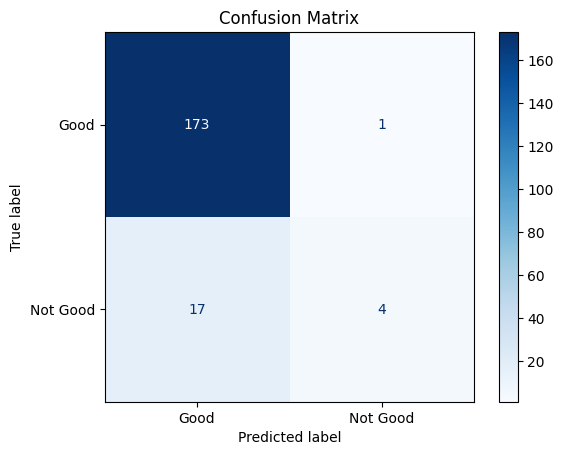

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
labels = ['Good','Not Good']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()